In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir(r"C:\Users\Pranjali\Downloads")

In [2]:
rural = gpd.read_file(r"D:\All project data\AP-CENSUS2011\rural-AP_2011.shp")

In [10]:
list(rural.columns.values)

['Unnamed_ 0',
 'DISTRICT',
 'Tothhold',
 'saljob',
 'psaljob',
 'govtsal',
 'pcgovtsal',
 'publicsal',
 'pcpublicsa',
 'salaryjob',
 'pcsalaryjo',
 'Unnamed_ 1',
 'hholdgov',
 'incl5k',
 'pcincl5k',
 'Unnamed__1',
 'Unnamed__2',
 'incg10k',
 'pcincg10k',
 'unirr_area',
 'irr_area',
 'TP',
 'noworker',
 'noworkerm',
 'agriworker',
 'infants',
 'tribal',
 'literate',
 'illiterate',
 'margworker',
 'mworker',
 'geometry']

In [37]:
#SENSITIVITY INDICATORS
#1.Total population
popln = []
pindex = []
for i in range(11,23):
    popln.append(rural['TP'][i])
for i in range(12):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [41]:
#2.tribal population
scst = []
scstindex = []
for i in range(11,23):
    scst.append((rural['tribal'][i]))
for i in range(12):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [39]:
#3.infants population
infants = []
infindex = []
for i in range(11,23):
    infants.append((rural['infants'][i]))
for i in range(12):
    index = (infants[i]-min(infants))/(max(infants)-min(infants))
    infindex.append(index)

In [42]:
TPindex =[]
for i in range(12):
    TPindex.append(((scst[i]+infants[i])/popln[i])*pindex[i] + (0.5-(scst[i]/popln[i]))*scstindex[i]+ (0.5-(infants[i]/popln[i]))*infindex[i])   

In [45]:
for i in range(len(TPindex)):
    if(TPindex[i]<0):
        TPindex[i]=1

In [44]:
#4.Unirrigated area
unirra = []
unirrindex = []
for i in range(11,23):
    unirra.append((rural['unirr_area'][i]))
for i in range(12):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [46]:
#5.Non-workers
nwork = []
nworkindex = []
for i in range(11,23):
    nwork.append((rural['noworker'][i]))
for i in range(12):
    index = (nwork[i]-min(nwork))/(max(nwork)-min(nwork))
    nworkindex.append(index)

In [47]:
#6.pop.with income<5000
incl5 = []
incl5index = []
for i in range(11,23):
    incl5.append((rural['incl5k'][i]))
for i in range(12):
    index = (incl5[i]-min(incl5))/(max(incl5)-min(incl5))
    incl5index.append(index)

In [48]:
#7.illiterate
illit = []
illitindex = []
for i in range(11,23):
    illit.append((rural['illiterate'][i]))
for i in range(12):
    index = (illit[i]-min(illit))/(max(illit)-min(illit))
    illitindex.append(index)

In [52]:
#Sensitivity index
S=[]
for i in range(12):
    S.append(0.2*(TPindex[i]+unirrindex[i]+nworkindex[i]+incl5index[i]+illitindex[i]))

In [50]:
#Adaptive capacity indicators
#1.households registered with govt.
hholdg = []
hholdgindex = []
for i in range(11,23):
    hholdg.append((rural['hholdgov'][i]))
for i in range(12):
    index = (hholdg[i]-min(hholdg))/(max(hholdg)-min(hholdg))
    hholdgindex.append(index)

In [51]:
#3.Irrigated area
irra = []
irrindex = []
for i in range(11,23):
    irra.append((rural['irr_area'][i]))
for i in range(12):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [53]:
# Agriculture workers
agworker =[]
agworkindex=[]
for i in range(11,23):
    agworker.append((rural['agriworker'][i]))
for i in range(12):
    index = (agworker[i]-min(agworker))/(max(agworker)-min(agworker))
    agworkindex.append(index)

In [54]:
agriindex=[]
for i in range(12):
    agriindex.append(0.5*(irrindex[i]+agworkindex[i]))

In [55]:
#4.pop.with income>10000
incg10 = []
incg10index = []
for i in range(11,23):
    incg10.append((rural['incg10k'][i]))
for i in range(12):
    index = (incg10[i]-min(incg10))/(max(incg10)-min(incg10))
    incg10index.append(index)

In [56]:
#5.main workers
aworker =[]
aworkindex=[]
for i in range(11,23):
    aworker.append((rural['mworker'][i]))
for i in range(12):
    index = (aworker[i]-min(aworker))/(max(aworker)-min(aworker))
    aworkindex.append(index)

In [57]:
#6.marginal workers
mworker =[]
mworkindex=[]
for i in range(11,23):
    mworker.append((rural['margworker'][i]))
for i in range(12):
    index = (mworker[i]-min(mworker))/(max(mworker)-min(mworker))
    mworkindex.append(index)

In [58]:
workindex=[]
for i in range(12):
    if(aworker[i]>=mworker[i]):
        workindex.append(0.33*0.25*((aworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(mworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))
    else:
        workindex.append(0.33*0.25*((mworker[i]/(aworker[i]+mworker[i]))*aworkindex[i]+(aworker[i]/(aworker[i]+mworker[i]))*mworkindex[i]))

In [59]:
#7.literate
lit = []
litindex = []
for i in range(11,23):
    lit.append((rural['literate'][i]))
for i in range(12):
    index = (lit[i]-min(lit))/(max(lit)-min(lit))
    litindex.append(index)

In [60]:
A=[]
for i in range(12):
    A.append(0.2*(hholdgindex[i]+agriindex[i]+incg10index[i]+workindex[i]+litindex[i]))

In [61]:
import pandas as pd
exposure = pd.read_excel( r"D:\All project data\2011-rlindex(100to30)-AP.xlsx")
E = 0.25*(exposure['r1index']+exposure['r2index']+exposure['r3index']+exposure['r5index'])

In [64]:
E1=[]
for i in range(len(E)):
    E1.append(E[i])

In [75]:
import pandas as pd
ex = pd.read_excel(r"D:\All project data\models-2006-2036(100to30)-rlindex-AP.xlsx")
Efut = 0.25*(ex['r1index']+ex['r2index']+ex['r3index']+ex['r5index'])

In [76]:
Efut1=[]
for i in range(len(Efut)):
    Efut1.append(Efut[i])

In [151]:
len(Efut1)

11

In [77]:
Vfut1=[]
for i in range(len(A)):
    Vfut1.append(0.33*(Efut1[i]+S[i]-A[i]))

In [91]:
max(rural1['Vfut1'])

0.36112814150563405

In [68]:
V=[]
for i in range(len(A)):
    V.append(0.33*(E1[i]+S[i]-A[i]))

In [69]:
rural1 = rural[11:23]
rural1

,Unnamed_ 0,DISTRICT,Tothhold,saljob,psaljob,govtsal,pcgovtsal,publicsal,pcpublicsa,salaryjob,...,noworker,noworkerm,agriworker,infants,tribal,literate,illiterate,margworker,mworker,geometry
11,11,Vizianagaram,478978,30597,6.39%,15053,3.14%,3707,0.77%,11788,...,1744214,750702,1083794,389718,833006,1783676,1923450,370892,1592020,(POLYGON ((714820.1051292028 1995427.466512974...
12,12,Visakhapatnam,602256,24905,4.14%,12553,2.08%,2364,0.39%,9988,...,2180154,893062,1104606,516534,1463896,2144334,2365000,603152,1726028,(POLYGON ((645619.3541264783 1933499.674927857...
13,13,EastGodavari,1176639,44838,3.81%,22482,1.91%,1755,0.15%,20626,...,4407738,1489304,2132844,790156,1969364,4659522,3021126,589030,2683880,(POLYGON ((601689.1443742218 1912665.822689813...
14,14,WestGodavari,881322,34838,3.95%,14577,1.65%,2103,0.24%,18180,...,3285656,1184736,2016540,619272,1620724,4071260,2185118,422232,2548490,(POLYGON ((579483.4776737008 1871750.776360074...
15,15,Krishna,852522,57860,6.79%,18799,2.21%,6179,0.72%,32908,...,2620106,1063868,1867440,517842,1519072,3315184,2032292,443354,2284016,"POLYGON ((498091.1140243359 1754583.321876153,..."
16,16,Guntur,862356,22838,2.65%,9662,1.12%,1507,0.17%,11686,...,2981798,1289624,2251228,665522,1862044,3595868,2874282,433090,3055262,(POLYGON ((478422.1628184493 1757039.292262023...
17,17,Prakasam,701745,23799,3.39%,13089,1.87%,1223,0.17%,9493,...,2556648,1144558,1716588,622148,1644952,2871826,2593906,424322,2484762,(POLYGON ((293424.5227989896 1670025.978954269...
18,18,SriPottiSriramuluNellore,590457,34283,5.81%,16235,2.75%,2855,0.48%,15956,...,2163218,861648,1204238,448162,1571484,2395238,1816616,416822,1631814,(POLYGON ((403151.0978834472 1494621.695790089...
19,19,YSR,516185,11665,2.26%,4085,0.79%,1060,0.21%,6520,...,1884584,806784,998928,442278,827062,2124712,1681962,386168,1535922,(POLYGON ((234809.7640384836 1547987.770538609...
20,20,Kurnool,637178,16385,2.57%,8128,1.28%,1674,0.26%,6583,...,2644098,1222268,1963366,746342,1267560,2780918,3027436,420044,2744212,(POLYGON ((82330.59655892331 1711150.381355926...


In [70]:
rural1['RL100']=exposure['rl100']
rural1['RL30']=exposure['r30']
rural1['return1index']=exposure['r1index']
rural1['return2index']=exposure['r2index']
rural1['return3index']=exposure['r3index']
rural1['return5index']=exposure['r5index']
rural1['Sindex']= S
rural1['Aindex']= A
rural1['Eindex']=E1
rural1['Vindex']=V

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [78]:
rural1['Vfut1']=Vfut1
rural1['Efut1']=Efut1

C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
rural1.to_file(driver = 'ESRI Shapefile', filename= r"C:\Users\Pranjali\Downloads\ruralAP2011.shp")

In [169]:
rural2 = rural1[['DISTRICT','Vindex']]
data_for_map = rural2.rename(index=str, columns={'DISTRICT':'dist','Vindex':'e'})
merged = rural1.set_index('DISTRICT').join(data_for_map.set_index('dist'))

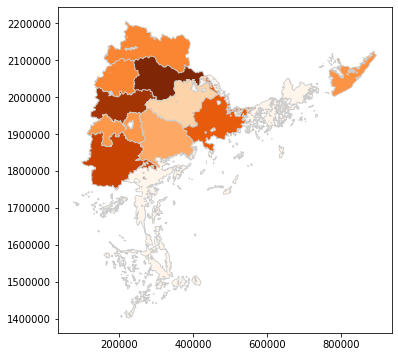

In [170]:
variable = 'Vindex'
# set the range for the choropleth

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

In [172]:
ax.axis('off')
# add a title
ax.set_title('Vulnerability in period 1981-2015', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.35))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\TL-V-2011(100to30).png', dpi=300)

In [171]:
max(rural1['Vindex'])

0.3023462777679519